# Dengue Drug Discovery

Dengue virus (DENV) is one of important human pathogen that can cause Dengue Fever. Bhatt et. al. (2013) estimate about 390 million humans were infected by this virus annually, and it mostly spread in tropical area. Drug discovery of this disease become important because there is no antiviral available (WHO, 2023). In this project, we will make machine learning model than can be used for selection of compounds that have potential as Dengue Therapeutics. This selection will make Dengue Drug Discovery process more efficient because it can reduce failure in laboratory experiment by selecting potential compounds.
<br> <br> This model can predict inhibition activity of compounds to one of protein of Dengue Virus called NS4B. NS4B is nonstructural protein of Dengue Virus that important for Dengue Replication Process. Li and Kang (2022) suggested NS4B as protein target of drug discovery because this protein has important interaction with other protein in Dengue replication process, and it can be used for a cell-based assay (phenotypic screening method) to screen a compound library to identify a potent hit.

## Data Collection

Bioactivity data will be collected from ChemBL database. ChemBL database collect bioactivity data of compounds those are generated from laboratory experiment those have published in scientific article.

In [1]:
#Import Library
from chembl_webresource_client.new_client import new_client
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [12]:
#Search Database of Target Protein in ChemBL database
def search_target_protein_source(protein):
    target=new_client.target
    target_query=target.search(protein)
    targets=pd.DataFrame(target_query)
    return targets

In [13]:
#Show all Target Protein data
search_target_protein_source('NS4B')

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'Q69422', 'xref_name': None, 'xre...",Hepatitis GB virus B,Hepatitis GB virus B NS5B RNA-dependent RNA po...,7.0,False,CHEMBL5981,"[{'accession': 'Q69422', 'component_descriptio...",SINGLE PROTEIN,39113
1,"[{'xref_id': 'P26664', 'xref_name': None, 'xre...",Hepatitis C virus genotype 1a (isolate 1) (HCV),Hepatitis C virus polyprotein,6.0,False,CHEMBL4620,"[{'accession': 'P26664', 'component_descriptio...",SINGLE PROTEIN,11104
2,"[{'xref_id': 'Q96662', 'xref_name': None, 'xre...",Bovine viral diarrhea virus (strain CP7) (BVDV...,Bovine viral diarrhoea virus polyprotein,6.0,False,CHEMBL3937,"[{'accession': 'Q96662', 'component_descriptio...",SINGLE PROTEIN,268305
3,"[{'xref_id': 'Q9WMX2', 'xref_name': None, 'xre...",Hepatitis C virus genotype 1b (isolate Con1) (...,Genome polyprotein,6.0,False,CHEMBL5536,"[{'accession': 'Q9WMX2', 'component_descriptio...",SINGLE PROTEIN,333284
4,"[{'xref_id': 'P26663', 'xref_name': None, 'xre...",Hepatitis C virus genotype 1b (isolate BK) (HCV),Genome polyprotein,6.0,False,CHEMBL6040,"[{'accession': 'P26663', 'component_descriptio...",SINGLE PROTEIN,11105
5,[],Hepatitis C virus genotype 1b (strain HC-J4) (...,Genome polyprotein,6.0,False,CHEMBL3638332,"[{'accession': 'O92972', 'component_descriptio...",SINGLE PROTEIN,420174
6,[],Hepatitis C virus genotype 1a (isolate H) (HCV),Genome polyprotein,6.0,False,CHEMBL3638344,"[{'accession': 'P27958', 'component_descriptio...",SINGLE PROTEIN,11108
7,[],Hepatitis C virus genotype 3a (isolate NZL1) (...,Genome polyprotein,6.0,False,CHEMBL3707464,"[{'accession': 'Q81258', 'component_descriptio...",SINGLE PROTEIN,356415
8,[],Hepatitis C virus genotype 1b (isolate Japanes...,Genome polyprotein,6.0,False,CHEMBL3988603,"[{'accession': 'P26662', 'component_descriptio...",SINGLE PROTEIN,11116
9,[],Hepatitis C virus genotype 2a (isolate JFH-1) ...,Genome polyprotein,6.0,False,CHEMBL4295932,"[{'accession': 'Q99IB8', 'component_descriptio...",SINGLE PROTEIN,356411


This project is targeted for Dengue, so we will select Dengue virus type 2 (strain Thailand) as source of targeted protein.

In [14]:
#Select the target_chembl_id value of selected source
selected_target=targets.target_chembl_id[10]
selected_target

'CHEMBL5980'

In [15]:
#Find bioactivity value from experiment using selected data
def search_bioactivity(target_chembl_id, standard_type):
    activity=new_client.activity
    chem=activity.filter(target_chembl_id=target_chembl_id).filter(standard_type=standard_type)
    return chem

It will resulted as JSON file

In [28]:
#Find IC50(Concentration of substances at 50% inhibition) value
chem=search_bioactivity(selected_target,'IC50')
chem

[{'activity_comment': 'active', 'activity_id': 7018430, 'activity_properties': [], 'assay_chembl_id': 'CHEMBL1794550', 'assay_description': 'PUBCHEM_BIOASSAY: Primary and Confirmatory Screening for Flavivirus Genomic Capping Enzyme Inhibition. (Class of assay: confirmatory) [Related pubchem assays (depositor defined):AID588708, AID588742]', 'assay_type': 'F', 'assay_variant_accession': None, 'assay_variant_mutation': None, 'bao_endpoint': 'BAO_0000190', 'bao_format': 'BAO_0000019', 'bao_label': 'assay format', 'canonical_smiles': 'COc1ccc2nc3cccc(OC)c3nc2c1', 'data_validity_comment': None, 'data_validity_description': None, 'document_chembl_id': 'CHEMBL1201862', 'document_journal': None, 'document_year': None, 'ligand_efficiency': None, 'molecule_chembl_id': 'CHEMBL1401841', 'molecule_pref_name': None, 'parent_molecule_chembl_id': 'CHEMBL1401841', 'pchembl_value': None, 'potential_duplicate': 0, 'qudt_units': 'http://www.openphacts.org/units/Nanomolar', 'record_id': 1128177, 'relation'

There are 1230 compounds founds

In [29]:
#Make dataframe of compounds data and their IC50 Value
def create_compounds_table(chem):
    columns=[]
    for i in chem[0].keys():
        columns.append(i)
    our_dict={}
    data=[]
    for col in columns:
        for row in range(0,len(chem)):
            data.append(chem[row][col])
        our_dict[col]=data
        data=[]  
    df=pd.DataFrame(our_dict)
    return df

In [128]:
df=create_compounds_table(chem)

In [129]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,active,7018430,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
1,active,7018431,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,12.31
2,active,7018432,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
3,active,7018433,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,50.97
4,active,7018434,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,None,24395840,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5042416,Inhibition of DENV NS2B-NS3 protease assessed ...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,nM,UO_0000065,None,9.0
1226,None,24395841,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5042416,Inhibition of DENV NS2B-NS3 protease assessed ...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,nM,UO_0000065,None,12.0
1227,None,24395842,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5042416,Inhibition of DENV NS2B-NS3 protease assessed ...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,nM,UO_0000065,None,6.0
1228,None,24395843,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5042416,Inhibition of DENV NS2B-NS3 protease assessed ...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,nM,UO_0000065,None,74.0


## Data Cleaning

In [130]:
#Check data that has no standard_value
df[df.standard_value.isna()]

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
1035,Not Determined,19192812,[],CHEMBL4390123,Inhibition of Dengue virus serotype 2 NS2B-NS3...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,None,None,None,None
1036,Not Determined,19192813,[],CHEMBL4390123,Inhibition of Dengue virus serotype 2 NS2B-NS3...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,None,None,None,None
1038,Not Determined,19192815,[],CHEMBL4390123,Inhibition of Dengue virus serotype 2 NS2B-NS3...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,None,None,None,None
1039,Not Determined,19192816,[],CHEMBL4390123,Inhibition of Dengue virus serotype 2 NS2B-NS3...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,None,None,None,None
1042,Not Determined,19192819,[],CHEMBL4390123,Inhibition of Dengue virus serotype 2 NS2B-NS3...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,None,None,None,None
1043,Not Determined,19192820,[],CHEMBL4390123,Inhibition of Dengue virus serotype 2 NS2B-NS3...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,None,None,None,None
1044,Not Determined,19192821,[],CHEMBL4390123,Inhibition of Dengue virus serotype 2 NS2B-NS3...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,None,None,None,None
1045,Not Determined,19192822,[],CHEMBL4390123,Inhibition of Dengue virus serotype 2 NS2B-NS3...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,None,None,None,None
1046,Not Determined,19192823,[],CHEMBL4390123,Inhibition of Dengue virus serotype 2 NS2B-NS3...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,None,None,None,None
1047,Not Determined,19192824,[],CHEMBL4390123,Inhibition of Dengue virus serotype 2 NS2B-NS3...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,None,None,None,None


In [134]:
#Check duplicate in molecules
df['molecule_chembl_id'].duplicated().sum()

20

Standard Value is our target of prediction, so we need to remove data that has NA value. If they have canonical_smiles data we can select those molecule for our prediction trial. <br><br> This model require unique molecules, because same molecules will make all features become similar. So we will remove duplicate molecules.

In [137]:
def cleaning_data(data):
    collect=data[data.standard_value.isna()][['molecule_chembl_id','canonical_smiles']]
    df=data[data.standard_value.notna()][['molecule_chembl_id','canonical_smiles','standard_value']]
    df['standard_value']=df['standard_value'].astype(float)
    return df,collect

In [136]:
#Removing Outlier
def remove_outlier(dataframe, col_name, th1=0.25, th3=0.75):
    quartile_1=dataframe[col_name].quantile(th1)
    quartile_3=dataframe[col_name].quantile(th3)
    iqr = quartile_3 -  quartile_1
    upper_limit = quartile_3 + 1.5 * iqr
    lower_limit = quartile_1 - 1.5 * iqr
    for i in dataframe.index:
        if dataframe[col_name][i] < lower_limit:
            dataframe.drop([i],inplace=True)
        elif dataframe[col_name][i] > upper_limit:
            dataframe.drop([i],inplace=True)
        else:
            continue
    return dataframe

In [140]:
#Removing Duplicate Molecule
def remove_duplicate_mol(dataframe):
    df=dataframe.drop_duplicates(subset=['molecule_chembl_id'])
    return df

In [143]:
df, collect= cleaning_data(df)

In [144]:
df = remove_duplicate_mol(df)

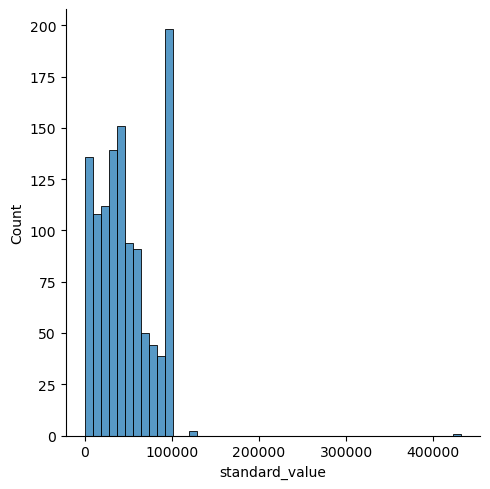

In [145]:
sns.displot(df.standard_value,kind='hist')
plt.show()

In [146]:
df=remove_outlier(dataframe=df,col_name='standard_value')

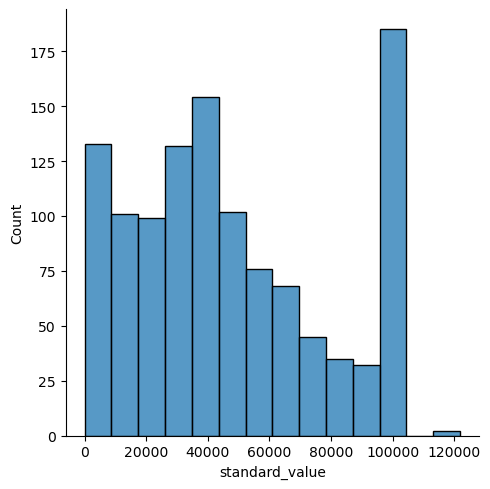

In [147]:
sns.displot(df.standard_value,kind='hist')
plt.show()

In [149]:
df.shape

(1164, 3)

This cleaning process resulted 1164 compounds.

## Data Pre-Processing

### Standard Value Conversion to Molar and Transformation using Negative Logarithmic Transformation

For simplifying the value, we convert standart unit from nanomolar to molar, and then we transform using negative logarithmic transformation. 

In [155]:
def pIC50(input):
    pIC50 = []
    for i in input['standard_value']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value',axis= 1)
        
    return x

In [156]:
#Convert IC50 value from nanomolar to molar, and the transform using negative logarithmic transformation
df2=pIC50(df)

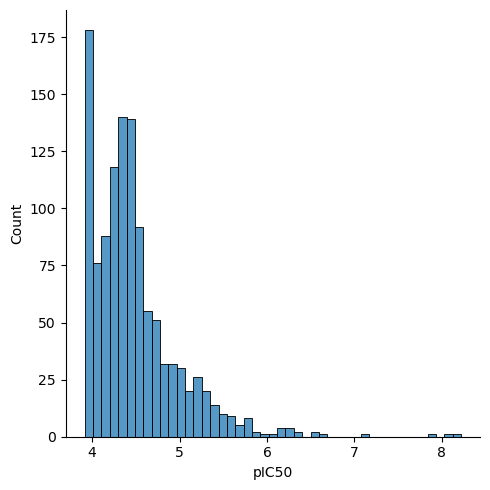

In [157]:
sns.displot(df2.pIC50,kind='hist')
plt.show()

In [151]:
df.describe()

,standard_value
count,1164.000000
mean,47750.739691
std,31750.832318
min,6.000000
25%,22055.000000
50%,41605.000000
75%,71177.500000
max,121900.000000


In [158]:
df2.describe()

,pIC50
count,1164.000000
mean,4.486936
std,0.495591
min,3.913996
25%,4.147657
50%,4.380855
75%,4.656493
max,8.221849


In [160]:
#Save bioactivity_data as csv file
df2.to_csv('bioactivity_data.csv',index=False)

### Generating Features by Calculate Fingerprint Descriptors from canonical_smiles data

We need too calculate the fingerprints descriptors from compounds canonical_smiles data to generate features that will be used from QSAR Model. Fingerprints were calculated using SMARTS systems implemented in PaDEL software.In this project, PubChemFP will be used as the fingerprints calculation. It will generate 881 binary features that represent the molecule structure of the compounds.

In [161]:
#Data preparation for molecular fingerprint
df3=pd.read_csv('bioactivity_data.csv')

For fingerprint calculation, we only need canonical_smiles and molecule_chembl_id. So we will remove the pIC50 value. After that we will convert the data to smi files for fingerprint calculation using PaDEL.

In [198]:
#Columns selection
df3=df3[['canonical_smiles','molecule_chembl_id']]

#Covert data to smi files
df3.to_csv('Padel/molecule.smi', sep='\t', index=False, header=False)

In [199]:
#Show the molecule.smi data using terminal
%cd Padel
! cat molecule.smi | head -5

/Users/macbook/Desktop/Project/python/denguedrugdiscovery/Padel
COc1ccc2nc3cccc(OC)c3nc2c1	CHEMBL1401841
O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O	CHEMBL1608853
O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CCOCC1	CHEMBL1429799
O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1	CHEMBL246446
CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(Cl)c1=O	CHEMBL1383455


In [200]:
#Show the number of molecule in molecule.smi file using terminal
! cat molecule.smi | wc -l

    1164


As we can see, the number of molecule in our smi file is still same with our data.
<br> We can calculate it using PaDEL software. Chanin Nantasenamat has already made Shell Script for fingerprint calculation process using PaDEL. The script is in this link: https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh
<br> We will used this script for calculation process.

In [201]:
#Show the script using terminal
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


PaDEL-Descriptor was developed using the Java language and consists of a library component and an interface component. We will run this software in Java Runtime Environment, so make sure Java Runtime Environment already installed.

In [202]:
! java --version

openjdk 11.0.18 2023-01-17
OpenJDK Runtime Environment Homebrew (build 11.0.18+0)
OpenJDK 64-Bit Server VM Homebrew (build 11.0.18+0, mixed mode)


In [203]:
! bash padel.sh

Processing CHEMBL1401841 in molecule.smi (1/1164). 
Processing CHEMBL1429799 in molecule.smi (3/1164). 
Processing CHEMBL1608853 in molecule.smi (2/1164). 
Processing CHEMBL246446 in molecule.smi (4/1164). 
Processing CHEMBL1383455 in molecule.smi (5/1164). Average speed: 3,55 s/mol.
Processing CHEMBL1485159 in molecule.smi (6/1164). Average speed: 1,87 s/mol.
Processing CHEMBL1383611 in molecule.smi (7/1164). Average speed: 1,38 s/mol.
Processing CHEMBL1730401 in molecule.smi (8/1164). Average speed: 1,04 s/mol.
Processing CHEMBL1440986 in molecule.smi (9/1164). Average speed: 0,93 s/mol.
Processing CHEMBL3194058 in molecule.smi (10/1164). Average speed: 0,83 s/mol.
Processing CHEMBL66953 in molecule.smi (11/1164). Average speed: 0,84 s/mol.
Processing CHEMBL1586109 in molecule.smi (12/1164). Average speed: 0,74 s/mol.
Processing CHEMBL3194143 in molecule.smi (13/1164). Average speed: 0,67 s/mol.
Processing CHEMBL1318358 in molecule.smi (14/1164). Average speed: 0,65 s/mol.
Processing

Processing CHEMBL1985591 in molecule.smi (107/1164). Average speed: 0,23 s/mol.
Processing CHEMBL1423709 in molecule.smi (108/1164). Average speed: 0,23 s/mol.
Processing CHEMBL1391547 in molecule.smi (109/1164). Average speed: 0,23 s/mol.
Processing CHEMBL1532198 in molecule.smi (110/1164). Average speed: 0,23 s/mol.
Processing CHEMBL1462687 in molecule.smi (111/1164). Average speed: 0,23 s/mol.
Processing CHEMBL1335165 in molecule.smi (112/1164). Average speed: 0,23 s/mol.
Processing CHEMBL1732365 in molecule.smi (113/1164). Average speed: 0,22 s/mol.
Processing CHEMBL1587159 in molecule.smi (114/1164). Average speed: 0,22 s/mol.
Processing CHEMBL1344289 in molecule.smi (115/1164). Average speed: 0,22 s/mol.
Processing CHEMBL1327721 in molecule.smi (116/1164). Average speed: 0,22 s/mol.
Processing CHEMBL1462906 in molecule.smi (118/1164). Average speed: 0,22 s/mol.
Processing CHEMBL1311708 in molecule.smi (117/1164). Average speed: 0,23 s/mol.
Processing CHEMBL1431126 in molecule.smi

Processing CHEMBL1528294 in molecule.smi (211/1164). Average speed: 0,18 s/mol.
Processing CHEMBL581225 in molecule.smi (212/1164). Average speed: 0,18 s/mol.
Processing CHEMBL1453783 in molecule.smi (213/1164). Average speed: 0,18 s/mol.
Processing CHEMBL1525576 in molecule.smi (214/1164). Average speed: 0,18 s/mol.
Processing CHEMBL1588205 in molecule.smi (215/1164). Average speed: 0,18 s/mol.
Processing CHEMBL1541890 in molecule.smi (216/1164). Average speed: 0,18 s/mol.
Processing CHEMBL1734152 in molecule.smi (217/1164). Average speed: 0,18 s/mol.
Processing CHEMBL1527565 in molecule.smi (218/1164). Average speed: 0,18 s/mol.
Processing CHEMBL1330109 in molecule.smi (219/1164). Average speed: 0,18 s/mol.
Processing CHEMBL1541795 in molecule.smi (220/1164). Average speed: 0,18 s/mol.
Processing CHEMBL1335615 in molecule.smi (221/1164). Average speed: 0,18 s/mol.
Processing CHEMBL1463571 in molecule.smi (222/1164). Average speed: 0,18 s/mol.
Processing CHEMBL1410860 in molecule.smi 

Processing CHEMBL1393237 in molecule.smi (315/1164). Average speed: 0,16 s/mol.
Processing CHEMBL1353570 in molecule.smi (314/1164). Average speed: 0,16 s/mol.
Processing CHEMBL1385494 in molecule.smi (316/1164). Average speed: 0,16 s/mol.
Processing CHEMBL1345754 in molecule.smi (317/1164). Average speed: 0,16 s/mol.
Processing CHEMBL1313485 in molecule.smi (318/1164). Average speed: 0,16 s/mol.
Processing CHEMBL1408292 in molecule.smi (319/1164). Average speed: 0,16 s/mol.
Processing CHEMBL2001761 in molecule.smi (320/1164). Average speed: 0,16 s/mol.
Processing CHEMBL2001904 in molecule.smi (321/1164). Average speed: 0,16 s/mol.
Processing CHEMBL1393327 in molecule.smi (322/1164). Average speed: 0,16 s/mol.
Processing CHEMBL1550490 in molecule.smi (323/1164). Average speed: 0,16 s/mol.
Processing CHEMBL1464042 in molecule.smi (324/1164). Average speed: 0,16 s/mol.
Processing CHEMBL1503442 in molecule.smi (325/1164). Average speed: 0,16 s/mol.
Processing CHEMBL1393512 in molecule.smi

Processing CHEMBL1533621 in molecule.smi (417/1164). Average speed: 0,15 s/mol.
Processing CHEMBL131037 in molecule.smi (418/1164). Average speed: 0,15 s/mol.
Processing CHEMBL1497243 in molecule.smi (419/1164). Average speed: 0,15 s/mol.
Processing CHEMBL1408935 in molecule.smi (420/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1521427 in molecule.smi (421/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1418928 in molecule.smi (422/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1411089 in molecule.smi (423/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1536196 in molecule.smi (424/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1434750 in molecule.smi (425/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1395453 in molecule.smi (426/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1698646 in molecule.smi (427/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1464715 in molecule.smi (428/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1454835 in molecule.smi 

Processing CHEMBL1594818 in molecule.smi (520/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1606705 in molecule.smi (521/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1572924 in molecule.smi (522/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1386872 in molecule.smi (523/1164). Average speed: 0,14 s/mol.
Processing CHEMBL119878 in molecule.smi (524/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1409740 in molecule.smi (525/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1409780 in molecule.smi (526/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1433919 in molecule.smi (527/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1399247 in molecule.smi (528/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1340229 in molecule.smi (529/1164). Average speed: 0,14 s/mol.
Processing CHEMBL441433 in molecule.smi (530/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1399331 in molecule.smi (531/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1976042 in molecule.smi (

Processing CHEMBL1583264 in molecule.smi (624/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1889709 in molecule.smi (623/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1551717 in molecule.smi (625/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1498652 in molecule.smi (626/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1365079 in molecule.smi (627/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1371004 in molecule.smi (629/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1889318 in molecule.smi (628/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1465938 in molecule.smi (630/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1985932 in molecule.smi (631/1164). Average speed: 0,14 s/mol.
Processing CHEMBL3199328 in molecule.smi (632/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1380801 in molecule.smi (633/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1537873 in molecule.smi (634/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1420379 in molecule.smi

Processing CHEMBL1400203 in molecule.smi (726/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1405333 in molecule.smi (727/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1704513 in molecule.smi (728/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1517389 in molecule.smi (729/1164). Average speed: 0,13 s/mol.
Processing CHEMBL1529285 in molecule.smi (730/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1994371 in molecule.smi (731/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1724452 in molecule.smi (732/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1538622 in molecule.smi (733/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1332506 in molecule.smi (734/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1518073 in molecule.smi (735/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1705201 in molecule.smi (736/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1450570 in molecule.smi (737/1164). Average speed: 0,14 s/mol.
Processing CHEMBL1421193 in molecule.smi

Processing CHEMBL1321164 in molecule.smi (829/1164). Average speed: 0,13 s/mol.
Processing CHEMBL1726363 in molecule.smi (830/1164). Average speed: 0,13 s/mol.
Processing CHEMBL8260 in molecule.smi (831/1164). Average speed: 0,13 s/mol.
Processing CHEMBL1500035 in molecule.smi (832/1164). Average speed: 0,13 s/mol.
Processing CHEMBL1893983 in molecule.smi (833/1164). Average speed: 0,13 s/mol.
Processing CHEMBL1460650 in molecule.smi (834/1164). Average speed: 0,13 s/mol.
Processing CHEMBL1500165 in molecule.smi (835/1164). Average speed: 0,13 s/mol.
Processing CHEMBL1496231 in molecule.smi (836/1164). Average speed: 0,13 s/mol.
Processing CHEMBL1707040 in molecule.smi (837/1164). Average speed: 0,13 s/mol.
Processing CHEMBL1726134 in molecule.smi (838/1164). Average speed: 0,13 s/mol.
Processing CHEMBL1535670 in molecule.smi (839/1164). Average speed: 0,13 s/mol.
Processing CHEMBL1568915 in molecule.smi (840/1164). Average speed: 0,13 s/mol.
Processing CHEMBL1382399 in molecule.smi (8

Processing CHEMBL1349793 in molecule.smi (932/1164). Average speed: 0,13 s/mol.
Processing CHEMBL2021431 in molecule.smi (933/1164). Average speed: 0,13 s/mol.
Processing CHEMBL1412968 in molecule.smi (934/1164). Average speed: 0,13 s/mol.
Processing CHEMBL1558183 in molecule.smi (935/1164). Average speed: 0,13 s/mol.
Processing CHEMBL3198496 in molecule.smi (936/1164). Average speed: 0,13 s/mol.
Processing CHEMBL1370025 in molecule.smi (937/1164). Average speed: 0,13 s/mol.
Processing CHEMBL1969088 in molecule.smi (938/1164). Average speed: 0,13 s/mol.
Processing CHEMBL3198976 in molecule.smi (939/1164). Average speed: 0,13 s/mol.
Processing CHEMBL1608255 in molecule.smi (940/1164). Average speed: 0,13 s/mol.
Processing CHEMBL1969672 in molecule.smi (941/1164). Average speed: 0,13 s/mol.
Processing CHEMBL1500942 in molecule.smi (942/1164). Average speed: 0,13 s/mol.
Processing CHEMBL1448709 in molecule.smi (943/1164). Average speed: 0,13 s/mol.
Processing CHEMBL1601846 in molecule.smi

Processing CHEMBL3740277 in molecule.smi (1035/1164). Average speed: 0,14 s/mol.
Processing CHEMBL4563546 in molecule.smi (1036/1164). Average speed: 0,14 s/mol.
Processing CHEMBL4519077 in molecule.smi (1037/1164). Average speed: 0,14 s/mol.
Processing CHEMBL3335494 in molecule.smi (1038/1164). Average speed: 0,14 s/mol.
Processing CHEMBL4464884 in molecule.smi (1039/1164). Average speed: 0,14 s/mol.
Processing CHEMBL4469272 in molecule.smi (1040/1164). Average speed: 0,14 s/mol.
Processing CHEMBL4519543 in molecule.smi (1041/1164). Average speed: 0,14 s/mol.
Processing CHEMBL4474101 in molecule.smi (1042/1164). Average speed: 0,14 s/mol.
Processing CHEMBL3741422 in molecule.smi (1043/1164). Average speed: 0,14 s/mol.
Processing CHEMBL4545026 in molecule.smi (1044/1164). Average speed: 0,14 s/mol.
Processing CHEMBL4533598 in molecule.smi (1045/1164). Average speed: 0,14 s/mol.
Processing CHEMBL4522006 in molecule.smi (1046/1164). Average speed: 0,14 s/mol.
Processing CHEMBL4441561 in 

Processing CHEMBL4870296 in molecule.smi (1137/1164). Average speed: 0,14 s/mol.
Processing CHEMBL4860508 in molecule.smi (1138/1164). Average speed: 0,14 s/mol.
Processing CHEMBL4854366 in molecule.smi (1139/1164). Average speed: 0,14 s/mol.
Processing CHEMBL4879110 in molecule.smi (1140/1164). Average speed: 0,14 s/mol.
Processing CHEMBL4868241 in molecule.smi (1141/1164). Average speed: 0,15 s/mol.
Processing CHEMBL4854249 in molecule.smi (1142/1164). Average speed: 0,15 s/mol.
Processing CHEMBL4876027 in molecule.smi (1143/1164). Average speed: 0,15 s/mol.
Processing CHEMBL4849553 in molecule.smi (1144/1164). Average speed: 0,15 s/mol.
Processing CHEMBL4875360 in molecule.smi (1145/1164). Average speed: 0,15 s/mol.
Processing CHEMBL4870696 in molecule.smi (1146/1164). Average speed: 0,15 s/mol.
Processing CHEMBL4856452 in molecule.smi (1147/1164). Average speed: 0,15 s/mol.
Processing CHEMBL4849139 in molecule.smi (1148/1164). Average speed: 0,15 s/mol.
Processing CHEMBL4861658 in 

In [208]:
#Check output csv file
! cat descriptors_output.csv | head -1

Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,PubchemFP40,PubchemFP41,PubchemFP42,PubchemFP43,PubchemFP44,PubchemFP45,PubchemFP46,PubchemFP47,PubchemFP48,PubchemFP49,PubchemFP50,PubchemFP51,PubchemFP52,PubchemFP53,PubchemFP54,PubchemFP55,PubchemFP56,PubchemFP57,PubchemFP58,PubchemFP59,PubchemFP60,PubchemFP61,PubchemFP62,PubchemFP63,PubchemFP64,PubchemFP65,PubchemFP66,PubchemFP67,PubchemFP68,PubchemFP69,PubchemFP70,PubchemFP71,PubchemFP72,PubchemFP73,PubchemFP74,PubchemFP75,PubchemFP76,PubchemFP77,PubchemFP78,PubchemFP79,PubchemFP80,PubchemFP81,PubchemFP82,PubchemFP

In [2]:
#Make dataframe from descriptor output data and bioactivity data
mol_descript=pd.read_csv('Padel/descriptors_output.csv')
bioactivity=pd.read_csv('bioactivity_data.csv')

In [3]:
#Drop Column Name
mol_descript=mol_descript.drop(columns=['Name'])

In [4]:
#Drop canocial_smiles columns
bioactivity=bioactivity.drop(columns=['canonical_smiles'])

In [5]:
#Combine output dataframe and bioactivity dataframe
df_combine=pd.concat([bioactivity,mol_descript],axis=1)

In [88]:
df_combine

,molecule_chembl_id,pIC50,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL1401841,4.000000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL1608853,4.909742,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL1429799,4.000000,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL246446,4.292685,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL1383455,4.000000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,CHEMBL5075008,8.045757,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1160,CHEMBL5092085,7.920819,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1161,CHEMBL5075993,8.221849,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1162,CHEMBL5081752,7.130768,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Convert dataframe to csv
df_combine.to_csv('dengue_bioactivity_dataset.csv',index=False)